# Diffusion Maps

Author: Ketson R. M. dos Santos,  
Date: June 3rd, 2020   

This example shows how to use the UQpy DiffusionMaps class to
* reveal the embedded structure of noisy data;

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the DiffusionMaps class from UQpy implemented in the DimensionReduction module.

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from UQpy.DimensionReduction import DiffusionMaps 

Sample points randomly following a parametric curve and plot the 3D graphic.

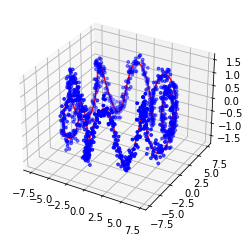

In [2]:

a=6
b=1
k=10
u = np.linspace(0, 2*np.pi, 1000)

v = k*u

x0 = (a+b*np.cos(0.8*v))*(np.cos(u))
y0 = (a+b*np.cos(0.8*v))*(np.sin(u))
z0 = b*np.sin(0.8*v)

rox = 0.2
roy = 0.2
roz = 0.2
x = x0 + rox*np.random.normal(0,1,len(x0))
y = y0 + roy*np.random.normal(0,1,len(y0))
z = z0 + roz*np.random.normal(0,1,len(z0))

X = np.array([x, y, z]).transpose()

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x, y, z, c='b', cmap=plt.cm.Spectral, s=8)
ax.plot(x0, y0, z0,'r',label='parametric curve')
plt.show()


Instantiate the class `DiffusionMaps` using `alpha=1`; `n_evecs=3`, because the first eigenvector is non-informative. Moreover, a Gaussian is used in the kernel construction.

In [3]:
dfm = DiffusionMaps(alpha=1, n_evecs=3, kernel_object=DiffusionMaps.gaussian_kernel)

Use the method `mapping` to compute the diffusion coordinates assuming `epsilon=0.3`.

In [4]:
diff_coords, evals, evecs = dfm.mapping(data=X, epsilon=0.3)

Plot the second and third diffusion coordinates to reveal the embedded structure of the data.

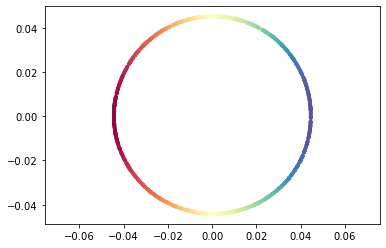

In [5]:
color = evecs[:,1]
plt.scatter(diff_coords[:,1], diff_coords[:,2], c=color, cmap=plt.cm.Spectral,s=8)
plt.axis('equal')
plt.show()

Use the colormap to observe how the embedded structure is distributed in the original set.

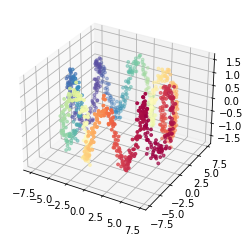

In [6]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x, y, z, c=color, cmap=plt.cm.Spectral, s=8)
plt.show()

Now, use an user defined kernel capable to handle this kind of data.

In [7]:
from user_kernel_diffusion import my_kernel_diffusion

dfm = DiffusionMaps(alpha=1, n_evecs=3, kernel_object=my_kernel_diffusion)

Use the method `mapping` to compute the diffusion coordinates assuming `epsilon=0.3`.

In [8]:
diff_coord_new, evals, evecs = dfm.mapping(data=X)

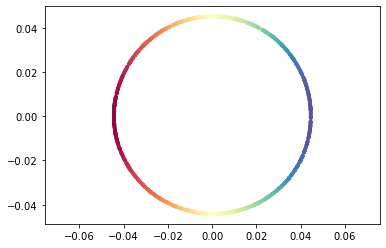

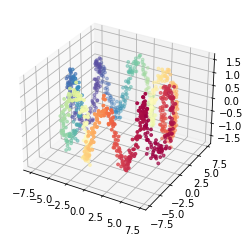

In [9]:
color = evecs[:,1]
plt.scatter(diff_coords[:,1], diff_coords[:,2], c=color, cmap=plt.cm.Spectral,s=8)
plt.axis('equal')
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x, y, z, c=color, cmap=plt.cm.Spectral, s=8)
plt.show()